In [6]:
%matplotlib inline
from utils import *
from matplotlib.collections import LineCollection

Due to low-pass filtering of membrane, increased oscillatory current input frequency leads to decreased membrane potential oscillation amplitudes. This decreased amplitude leads to increased tonic input needed to reach threshold. Due to input being the result of a Poisson process, increased tonic input leads to increased input variance. Then, increased variance in input leads to increased variance in membrane potential. Since the variance in membrane potential is proportional to the average weights (and this are in turn what we change to increase the tonic input), the increased varianced will be reflected as proportional increases in instantaneous noise amplitudes. On the other hand, because neurons reach threshold faster under higher frequency oscillations, the accumulated noise at the time of spike (integrating the increased instantaneous noise over time) will tends to be less since it is integrated for less time. Therefore, the resulting increase of decrease in variance when reaching threshold will respond to the relationship between instantaneous noise increase and accumulated noise decrease. 

## Neuron params

In [7]:
# Default params
R_m = 142 * 1e6                                     # 142 MΩ
V_th = 15 * 1e-3                                    # 15 mV
tau_m = 24 * 1e-3                                   # 24 ms
f = 5                                               # 5 Hz
T = 1 / f
omega = 2 * np.pi * f                               # 5 Hz in rad/s
I_osc = 40 * 1e-12                                  # 40 pA
M = 5                                               # number of input levels
range_frac = 0.75                                   # fraction of range to use
sigma_w_avg = 0.0135                                # average sigma_w
eta = sigma_w_to_eta(sigma_w_avg, V_th, tau_m, f)   # noise strength (default: 0.14)

## A - Effective membrane oscillation decreases with frequency (los-pass filter)

In [8]:
fs = np.linspace(1,50,1000)
amps = amplitude_mem_potential(R_m, I_osc, tau_m, fs)

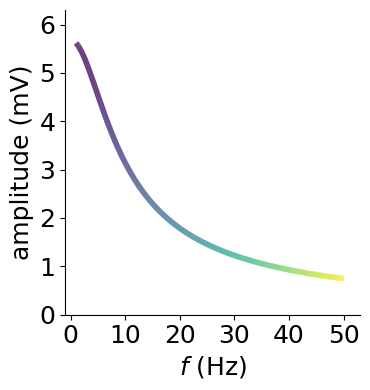

In [9]:
# Create a colormap
colors = cm.viridis(np.linspace(0, 1, len(fs)))

# Create line segments for plotting
points = np.array([fs, amps * 1e3]).T.reshape(-1, 1, 2)
segments = np.concatenate([points[:-1], points[1:]], axis=1)

# Create a LineCollection from the segments and colors
lc = LineCollection(segments, cmap='viridis', norm=plt.Normalize(0, 1))
lc.set_array(np.linspace(0, 1, len(fs)))
lc.set_linewidth(4)

# Plotting
plt.figure(figsize=(3.8, 4))
ax = plt.gca()
ax.add_collection(lc)
ax.set_xlim(fs.min(), fs.max())
ax.set_ylim((amps * 1e3).min(), (amps * 1e3).max())

plt.xlabel('$f$ (Hz)', fontsize=18)
plt.ylabel('amplitude (mV)', fontsize=18)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.ylim(0, 6.3)
plt.xlim(-1, 53)

sb.despine()

plt.tight_layout()

#plt.savefig('plots/fig2/fig2D_memOscAmp.svg', dpi=600)

plt.show()